In [4]:
import sys
sys.path.append('../src/')

import os
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import utils
import config

from utils import make_ndarray_from_csv, get_int_label
from collections import Counter, OrderedDict
from matplotlib import rcParams
from imblearn.over_sampling import SMOTE, RandomOverSampler

ImportError: cannot import name '_joblib_parallel_args' from 'sklearn.utils.fixes' (/media/data/hungnt/anaconda3/lib/python3.8/site-packages/sklearn/utils/fixes.py)

## Config

In [ ]:
# Change option so that pandas always display all rows of the dataframe
pd.set_option('display.max_rows', None)

In [ ]:
TAKE_MINOR_AT = -5
fold = '1.0'
mode = 'val'

## Count number of samples for each class

In [ ]:
def make_ndarray_from_raw_csv(fold, mode = 'None'):
    dat_cfg = config.data_config
    if mode.lower() == 'train':
        train_csv_path = os.path.join(dat_cfg['RAW_TRAIN_CSV_DIR'], f'{fold}_train.csv')
        df_train = pd.read_csv(train_csv_path, index_col = 0).fillna(0)    
        
        train_features = np.array(df_train.iloc[:,:10000])
        train_labels = np.array(df_train.iloc[:,-1])
        # train_labels = np.array([get_int_label(label) for label in train_labels])
        return train_features, train_labels    
    
    elif mode.lower() == 'test' or mode.lower() == 'val':
        test_csv_path = os.path.join(dat_cfg['RAW_TEST_CSV_DIR'], f'{fold}_test.csv')
        df_test = pd.read_csv(test_csv_path, index_col = 0).fillna(0)
        
        test_features = np.array(df_test.iloc[:,:10000])
        test_labels = np.array(df_test.iloc[:,-1])
        # test_labels = np.array([get_int_label(label) for label in test_labels])
        return test_features, test_labels
    
    elif mode.lower() == 'all':
        train_csv_path = os.path.join(dat_cfg['RAW_TRAIN_CSV_DIR'], f'{fold}_train.csv')
        df_train = pd.read_csv(train_csv_path, index_col = 0).fillna(0)    
        
        train_features = np.array(df_train.iloc[:,:10000])
        train_labels = np.array(df_train.iloc[:,-1])
        
        test_csv_path = os.path.join(dat_cfg['RAW_TEST_CSV_DIR'], f'{fold}_test.csv')
        df_test = pd.read_csv(test_csv_path, index_col = 0).fillna(0)
        
        test_features = np.array(df_test.iloc[:,:10000])
        test_labels = np.array(df_test.iloc[:,-1])
        
        features = np.append(train_features, test_features, axis = 0)
        labels = np.append(train_labels, test_labels, axis = 0)
        # labels = np.array([get_int_label(label) for label in labels])
        
        return features, labels
        
    else:        
        train_csv_path = os.path.join(dat_cfg['RAW_TRAIN_CSV_DIR'], f'{fold}_train.csv')
        test_csv_path = os.path.join(dat_cfg['RAW_TEST_CSV_DIR'], f'{fold}_test.csv')
        df_train = pd.read_csv(train_csv_path, index_col = 0).fillna(0)
        df_test = pd.read_csv(test_csv_path, index_col = 0).fillna(0)
        
        train_features = np.array(df_train.iloc[:,:10000])
        train_labels = np.array(df_train.iloc[:,-1])
        # train_labels = np.array([get_int_label(label) for label in train_labels])
        
        test_features = np.array(df_test.iloc[:,:10000])
        test_labels = np.array(df_test.iloc[:,-1])
        # test_labels = np.array([get_int_label(label) for label in test_labels])
        
        return train_features, train_labels, test_features, test_labels

In [ ]:
features, labels = make_ndarray_from_raw_csv(fold, mode = mode)
features.shape, labels.shape

((597, 10000), (597,))

In [ ]:
labels_count = Counter(labels)

In [ ]:
print(labels_count)

Counter({'Embryonal': 126, 'Glioblastoma': 89, 'Ependymal': 73, 'Other glioma': 70, 'Glio-neuronal': 44, 'Glioma IDH': 42, 'Sella': 37, 'Mesenchymal': 35, 'Control': 27, 'Pineal': 18, 'Plexus': 18, 'Nerve': 7, 'Melanocytic': 6, 'Haematopoietic': 5})


In [ ]:
sorted_labels_count = OrderedDict(labels_count.most_common())
print(sorted_labels_count)

OrderedDict([('Embryonal', 126), ('Glioblastoma', 89), ('Ependymal', 73), ('Other glioma', 70), ('Glio-neuronal', 44), ('Glioma IDH', 42), ('Sella', 37), ('Mesenchymal', 35), ('Control', 27), ('Pineal', 18), ('Plexus', 18), ('Nerve', 7), ('Melanocytic', 6), ('Haematopoietic', 5)])


In [ ]:
df = pd.DataFrame.from_dict(sorted_labels_count, orient='index').reset_index()
df = df.rename(columns = {'index':'labels', 0:'samples'})
print(df.to_string())
# df

            labels  samples
0        Embryonal      126
1     Glioblastoma       89
2        Ependymal       73
3     Other glioma       70
4    Glio-neuronal       44
5       Glioma IDH       42
6            Sella       37
7      Mesenchymal       35
8          Control       27
9           Pineal       18
10          Plexus       18
11           Nerve        7
12     Melanocytic        6
13  Haematopoietic        5


In [ ]:
df.loc[df['labels'] == 'Control']['samples']

8    27
Name: samples, dtype: int64

In [ ]:
total_samples = np.sum(df['samples'])
total_samples

597

## Visualization

In [ ]:
classes = np.array(df.iloc[:,0])
n_samples = np.array(df.iloc[:,-1])
counts = df['labels'].value_counts().reset_index(name = 'samples')
print(labels.shape, n_samples.shape)

(597,) (14,)


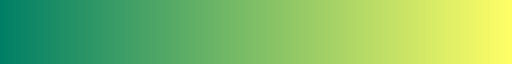

In [ ]:
sns.set(font_scale=1)
# test color for sns graph pallette
'''
Possible palette values include:
Name of a seaborn palette (deep, muted, bright, pastel, dark, colorblind)

Name of matplotlib colormap (check here: https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html)

‘husl’ or ‘hls’

‘ch:<cubehelix arguments>’

‘light:<color>’, ‘dark:<color>’, ‘blend:<color>,<color>’,

A sequence of colors in any format matplotlib accepts
'''
graph_palette = "summer"
sns.color_palette(graph_palette, as_cmap=True)

### All class group data distribution

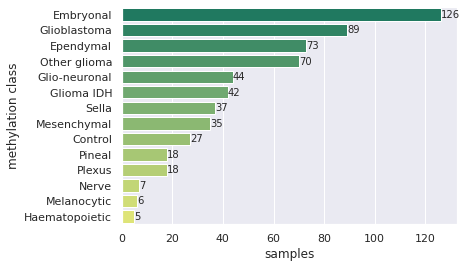

In [ ]:
rcParams['figure.figsize'] = 20, 10
graph = sns.barplot(x = n_samples, y = classes, data = counts, palette = graph_palette)
graph.bar_label(graph.containers[0])
graph.set_xlabel('samples')
graph.set_ylabel('methylation class')
plt.show()

### Each class group data distribution

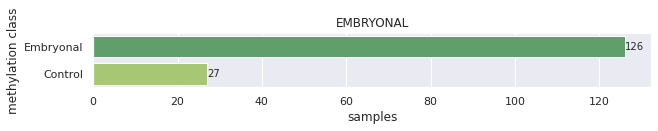

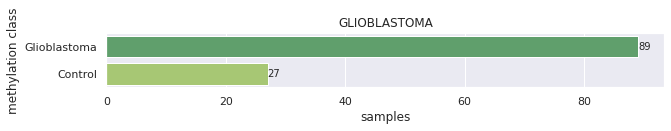

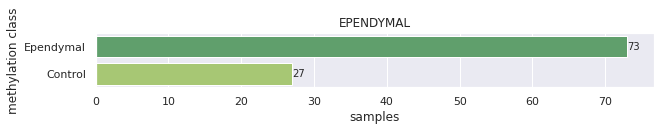

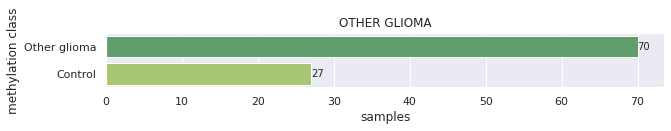

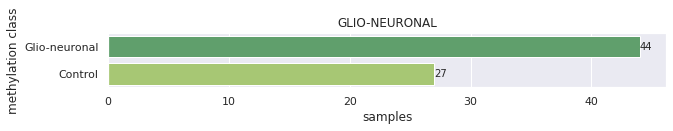

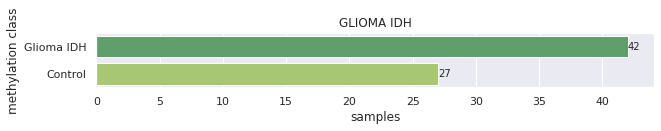

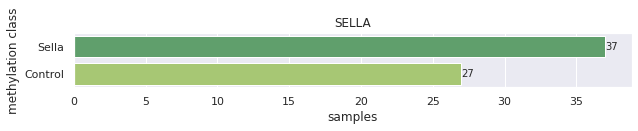

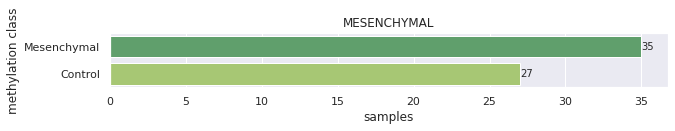

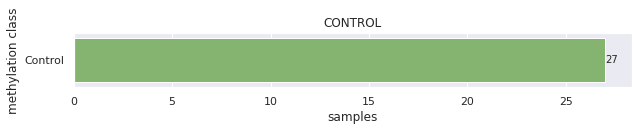

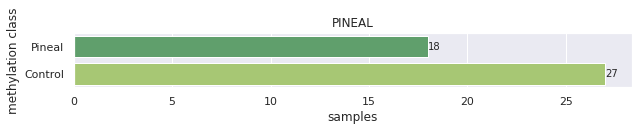

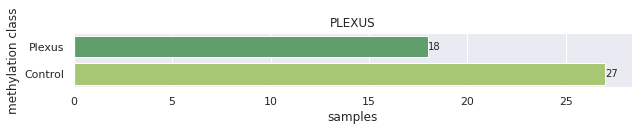

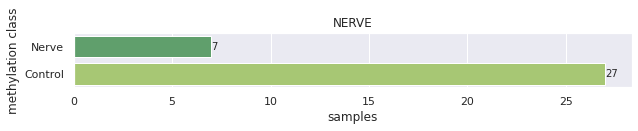

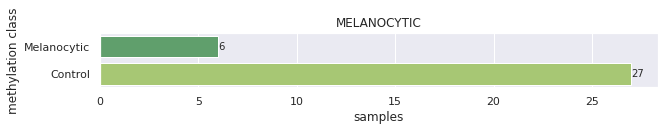

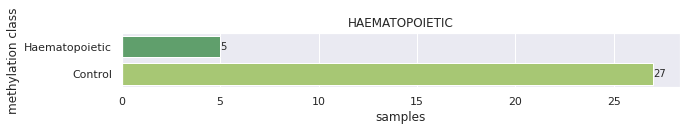

In [ ]:
groups = utils.groups
for i in range(len(groups)):
    group = df.iloc[i,:]['labels']
    group_counts = df.iloc[i,:]['samples']
    control_counts = df.loc[df['labels'] == 'Control']['samples'].item()
    control = "Control"
    others_counts = total_samples - group_counts - control_counts
    others = "Others"
    
    rcParams['figure.figsize'] = 10, 1
    graph = sns.barplot(x = [group_counts, control_counts], y = [group, control], palette = graph_palette)
    graph.bar_label(graph.containers[0])
    graph.set_xlabel('samples')
    graph.set_ylabel('methylation class')
    graph.set_title(f'{group.upper()}')
    plt.show()

## Tackle the imbalanced class distribution

#### SMOTE

In [ ]:
X = features
y = labels
print(np.unique(labels))
print(np.unique(y))

['Control' 'Embryonal' 'Ependymal' 'Glio-neuronal' 'Glioblastoma'
 'Glioma IDH' 'Haematopoietic' 'Melanocytic' 'Mesenchymal' 'Nerve'
 'Other glioma' 'Pineal' 'Plexus' 'Sella']
['Control' 'Embryonal' 'Ependymal' 'Glio-neuronal' 'Glioblastoma'
 'Glioma IDH' 'Haematopoietic' 'Melanocytic' 'Mesenchymal' 'Nerve'
 'Other glioma' 'Pineal' 'Plexus' 'Sella']


In [ ]:
minor_classes = list(sorted_labels_count.keys())[TAKE_MINOR_AT:]
print(minor_classes)

['Pineal', 'Plexus', 'Nerve', 'Melanocytic', 'Haematopoietic']


In [ ]:
minor_indexes = []
i = 0
for label in labels:
    if label in minor_classes:
        minor_indexes.append(i)
    i += 1
print(len(minor_indexes))

54


In [ ]:
minor_fetures = np.array([features[i] for i in minor_indexes])
minor_labels = np.array([labels[i] for i in minor_indexes])
major_features = np.array([features[i] for i in range(len(features)) if i not in minor_indexes])
major_labels = np.array([labels[i] for i in range(len(features)) if i not in minor_indexes])
print(np.unique(minor_labels), len(np.unique(minor_labels)))
print(np.unique(major_labels), len(np.unique(major_labels)))
print(len(minor_fetures), len(major_features))
print(len(minor_labels), len(major_features))

['Haematopoietic' 'Melanocytic' 'Nerve' 'Pineal' 'Plexus'] 5
['Control' 'Embryonal' 'Ependymal' 'Glio-neuronal' 'Glioblastoma'
 'Glioma IDH' 'Mesenchymal' 'Other glioma' 'Sella'] 9
54 543
54 543


In [ ]:
X_minor = minor_fetures
y_minor = minor_labels
X_major = major_features
y_major = major_labels
print(np.unique(y_major),'\n' ,np.unique(y_minor))

['Control' 'Embryonal' 'Ependymal' 'Glio-neuronal' 'Glioblastoma'
 'Glioma IDH' 'Mesenchymal' 'Other glioma' 'Sella'] 
 ['Haematopoietic' 'Melanocytic' 'Nerve' 'Pineal' 'Plexus']


In [ ]:
smote = SMOTE(sampling_strategy = "auto", random_state = 42)
new_X_minor, new_y_minor = smote.fit_resample(X_minor, y_minor)

TypeError: __init__() got an unexpected keyword argument 'n_samples'

In [ ]:
print(type(new_X_minor), type(new_y_minor), len(new_X_minor), len(new_y_minor))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 325 325


In [ ]:
new_X = np.append(X_major, new_X_minor, axis = 0)
new_y = np.append(y_major, new_y_minor)
print(len(new_X), len(new_y))

2341 2341
